In [1]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def download_freq_mass_diffs(mode):
    target_path = f'chi2025_isf_orbi_{mode}.tsv'
    if os.path.exists(target_path):
        print(f'{mode} data has already been downloaded. Skip.')
    else:
        # download from zenodo take 20sec-2min. Only need to do once. 
        try:
            with requests.get(f'https://raw.githubusercontent.com/shuzhao-li-lab/mass2chem/refs/heads/master/mass2chem/source_data/chi2025_isf_orbi_{mode}.tsv', stream=True) as response:
                response.raise_for_status()

                with open(target_path, 'wb') as file:
                        for chunk in response.iter_content(chunk_size=8192):
                            file.write(chunk)
            print(f"Downloaded file to: {os.path.abspath(target_path)}")

        except requests.exceptions.RequestException as e:
            print(f"Error during download: {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
        finally:
            print(f"Finished downloaded file: {os.path.abspath(target_path)}")

In [4]:
download_freq_mass_diffs('pos')
download_freq_mass_diffs('neg')

Downloaded file to: /Users/chiy/Projects/computational/in_source_fragments_serum/analysis_for_upload_branch_yc/in_source_fragments_serum/analysis/extra_figs_for_pub/3a_s1/chi2025_isf_orbi_pos.tsv
Finished downloaded file: /Users/chiy/Projects/computational/in_source_fragments_serum/analysis_for_upload_branch_yc/in_source_fragments_serum/analysis/extra_figs_for_pub/3a_s1/chi2025_isf_orbi_pos.tsv
Downloaded file to: /Users/chiy/Projects/computational/in_source_fragments_serum/analysis_for_upload_branch_yc/in_source_fragments_serum/analysis/extra_figs_for_pub/3a_s1/chi2025_isf_orbi_neg.tsv
Finished downloaded file: /Users/chiy/Projects/computational/in_source_fragments_serum/analysis_for_upload_branch_yc/in_source_fragments_serum/analysis/extra_figs_for_pub/3a_s1/chi2025_isf_orbi_neg.tsv


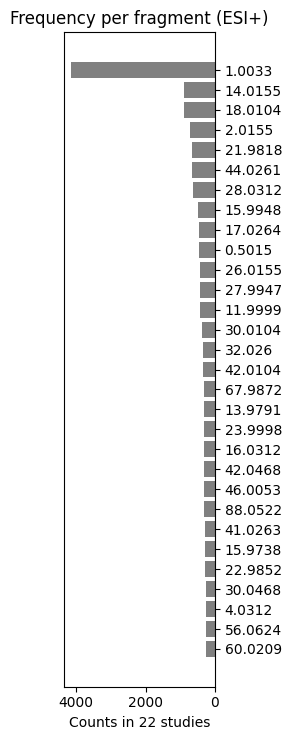

In [ ]:
pos_top_30 = pd.read_csv('chi2025_isf_orbi_pos.tsv', sep='\t', encoding='ISO-8859-1')[:30][['delta_mz', 'count_estimate', 'note', 'dict']].to_dict()
# Do barplot for pos

xlabels = pos_top_30['delta_mz'].values()
y = pos_top_30['count_estimate'].values()
x = range(len(y))

fig, ax = plt.subplots(figsize=(2.5, 7.5))
hbars = ax.barh(x, y, color='grey')
ax.set_yticks(x, labels=xlabels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.invert_xaxis()
ax.yaxis.tick_right() # will add annotation to delta mass values to right
ax.set_xlabel('Counts in 22 studies')
ax.set_title('Frequency per fragment (ESI+)')
plt.tight_layout()
plt.savefig(f"3a_fragment_counts_pos_ions.pdf")

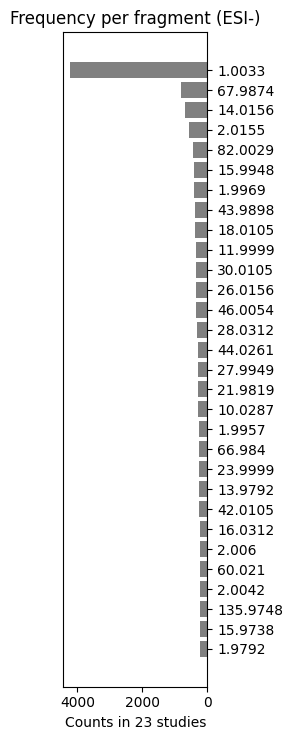

In [ ]:
neg_top_30 = pd.read_csv('chi2025_isf_orbi_neg.tsv', sep='\t', encoding='ISO-8859-1')[:30][['delta_mz', 'count_estimate', 'note', 'dict']].to_dict()
# Do barplot for pos

xlabels = neg_top_30['delta_mz'].values()
y = neg_top_30['count_estimate'].values()
x = range(len(y))

fig, ax = plt.subplots(figsize=(2.5, 7.5))
hbars = ax.barh(x, y, color='grey')
ax.set_yticks(x, labels=xlabels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.invert_xaxis()
ax.yaxis.tick_right() # will add annotation to delta mass values to right
ax.set_xlabel('Counts in 23 studies')
ax.set_title('Frequency per fragment (ESI-)')
plt.tight_layout()
plt.savefig(f"s1a_fragment_counts_neg_ions.pdf")